# **A SINGLE NEURON**

In [2]:
# adding all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
data = pd.read_csv("winequality-red.csv")

In [8]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  

In [9]:
print("\nDataset Shape:", data.shape)


Dataset Shape: (1599, 12)


In [10]:
X = data.drop(columns=['quality'])  # Features (11 columns)
y = data['quality']                 # Target (wine quality)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
#Step 3: Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer (11 features)
    Dense(32, activation='relu'),                     # Hidden layer
    Dense(1)                                          # Output layer (regression)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [15]:
#training
history = model.fit(X_scaled, y, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 25.4773 - mae: 4.9313 - val_loss: 10.0328 - val_mae: 2.9896
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.9552 - mae: 2.1312 - val_loss: 2.7899 - val_mae: 1.3065
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3308 - mae: 1.1696 - val_loss: 2.2043 - val_mae: 1.1885
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1021 - mae: 1.1407 - val_loss: 1.9505 - val_mae: 1.1207
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7578 - mae: 1.0351 - val_loss: 1.7415 - val_mae: 1.0604
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5719 - mae: 0.9751 - val_loss: 1.6014 - val_mae: 1.0090
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3813 - mae: 0.9063 - val_loss: 1.5095 - val_mae: 0.9741
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1963 - mae: 0.8622 - val_loss: 1.3806 - val_mae: 0.9376
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0657 - ma

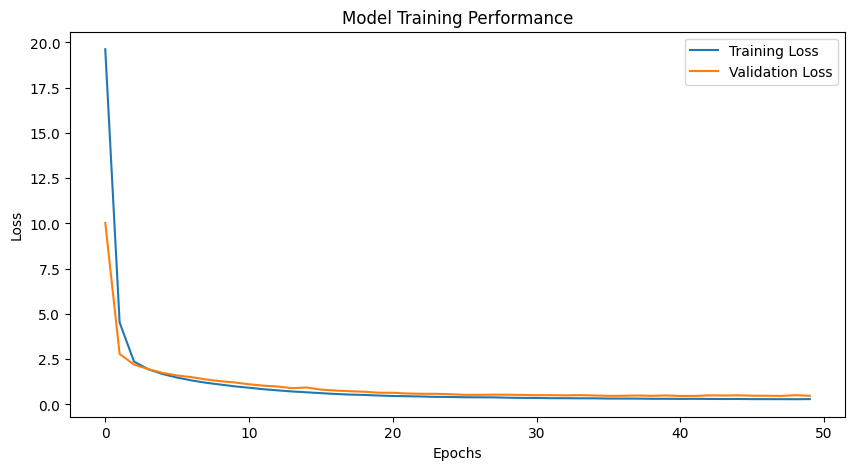

In [16]:
#plotting
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Training Performance")
plt.show()

In [17]:
#final model evaluation
loss, mae = model.evaluate(X_scaled, y, verbose=0)
print(f"\nFinal Model Loss: {loss:.4f}, Mean Absolute Error: {mae:.4f}")


Final Model Loss: 0.3263, Mean Absolute Error: 0.4368
